# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf

In [3]:
stock_ticker = 'AMD'  # AMD Ryzen

In [4]:
start_date = "2023-10-01"
end_date = "2024-09-30"

In [5]:
intel_data = yf.download(stock_ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [6]:
# intel_data.head()

In [7]:
# intel_data.info()

# Exploratory Data Analysis (EDA)

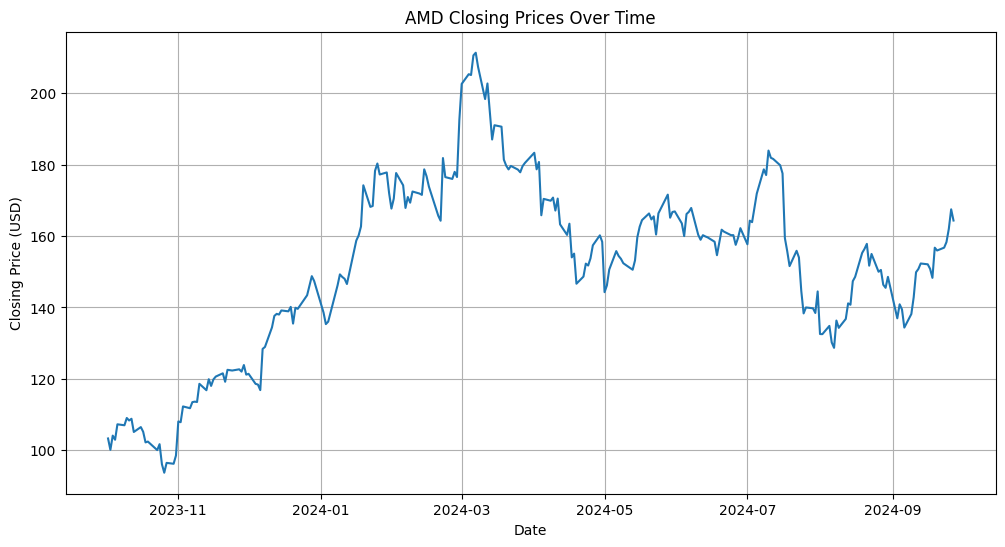

In [8]:
# Visualization: Closing prices over time.

plt.figure(figsize=(12, 6))
plt.plot(intel_data['Close'])
plt.title(f'{stock_ticker} Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

## Volatility is defined as the rate at which the price of a security increases or decreases for a given set of returns.

In [9]:
# Calculate daily price changes

intel_data['Price Change'] = intel_data['Close'].diff()

In [10]:
# intel_data.head()

In [11]:
# Calculate standard deviation for different time windows

new_df = intel_data[['Open', 'Close', 'Price Change']]

for window in [7, 30, 90, 365]:  # 1 week, 1 month, 3 months, 1 year
    new_df[f'Volatility ({window} days)'] = new_df['Price Change'].rolling(window=window).std()

In [12]:
print(new_df.shape)
# new_df.tail(10)

(250, 7)


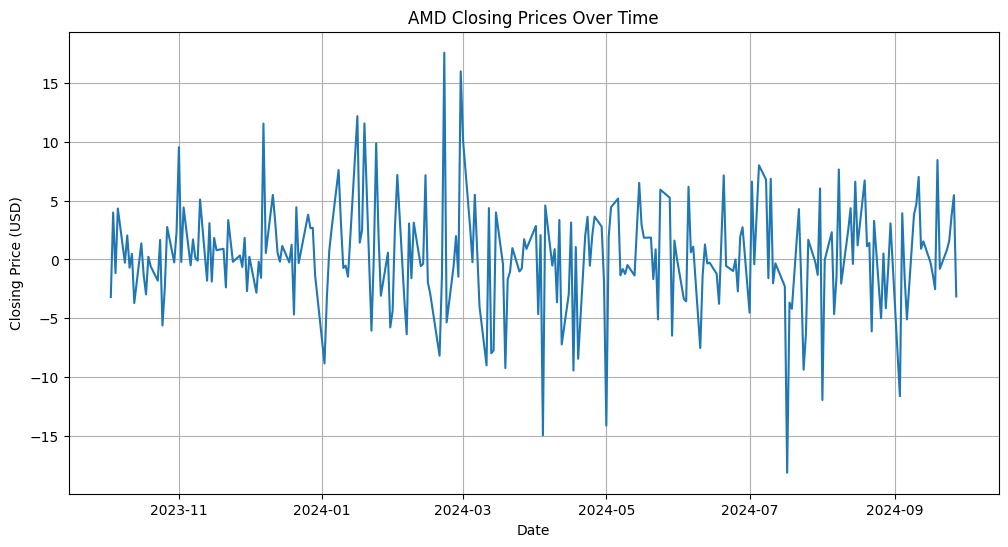

In [13]:
# Visualization: Price Change over time.

plt.figure(figsize=(12, 6))
plt.plot(new_df['Price Change'])
plt.title(f'{stock_ticker} Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

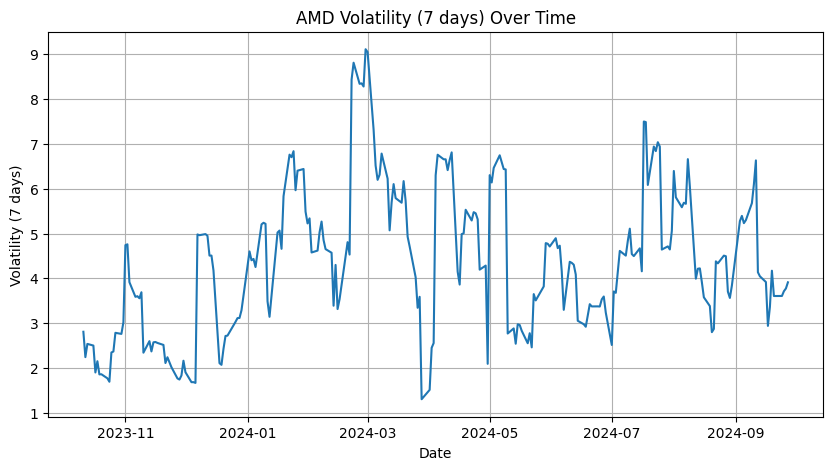

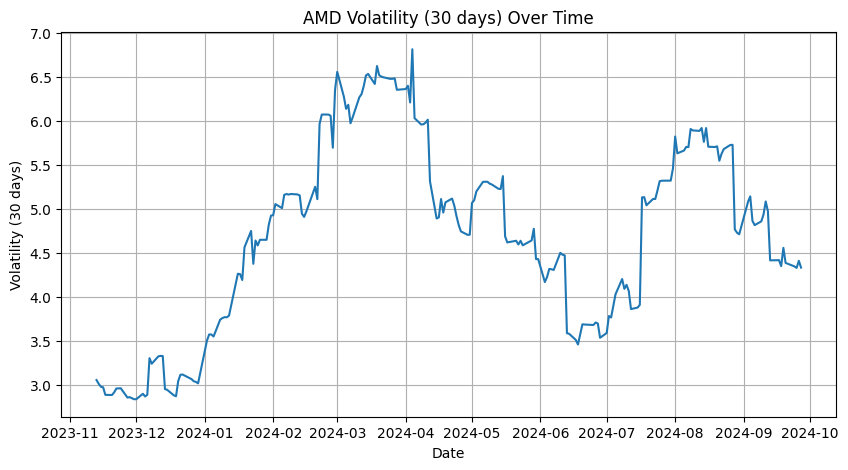

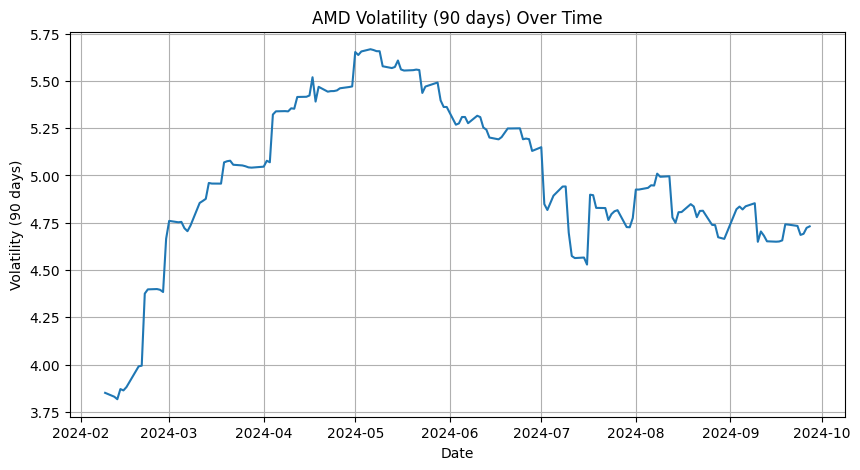

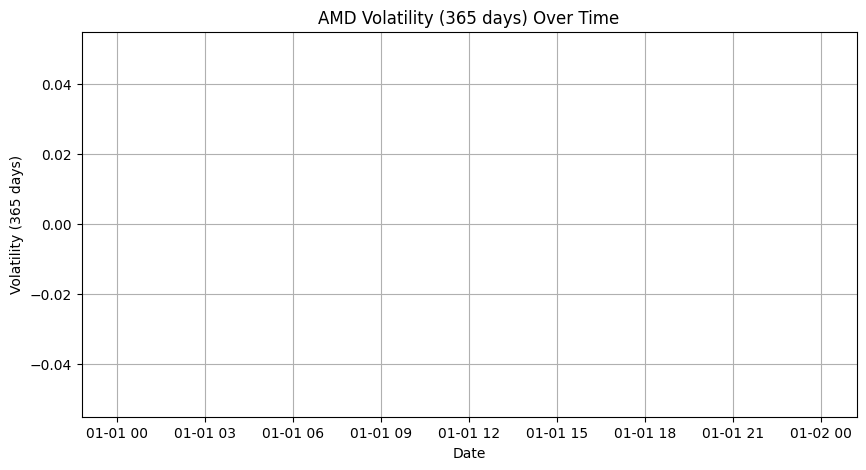

In [14]:
# plotting every votality in new_Df over time

for column in new_df.columns:
  if 'Volatility' in column:
    plt.figure(figsize=(10, 5))
    plt.plot(new_df.index, new_df[column])
    plt.title(f'{stock_ticker} {column} Over Time')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

# Feature Engineering

## Moving Averages (SMA, EMA)


## SMA - Simple Moving Average -  a stock's average closing price over a specified period


In [15]:
new_df['SMA_10'] = new_df['Close'].rolling(window=10).mean()
new_df['SMA_20'] = new_df['Close'].rolling(window=20).mean()
# new_df['SMA_50'] = new_df['Close'].rolling(window=50).mean()

In [16]:
# new_df[['Close', 'SMA_10', 'SMA_20']].tail()

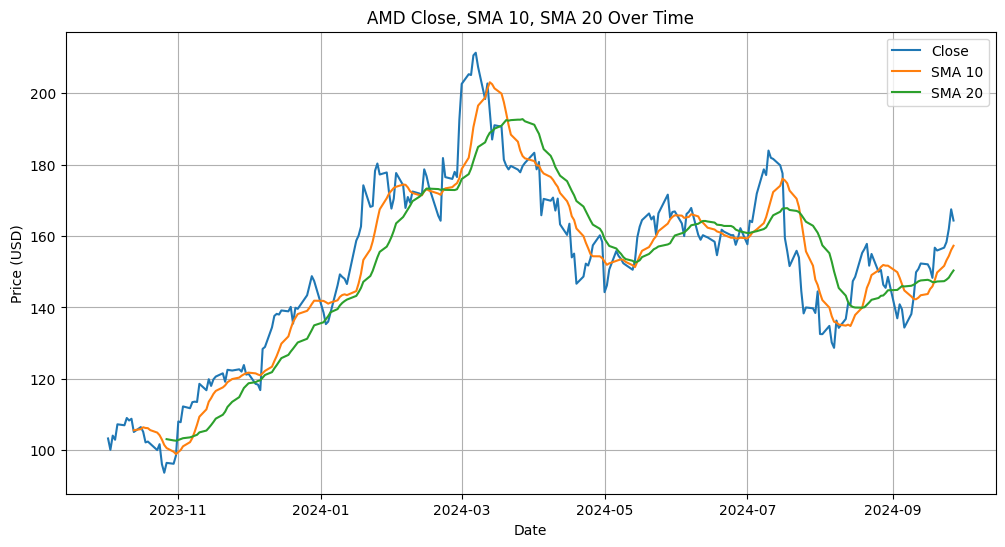

In [17]:
# plotting Close, SMA_10, SMA_20 over time in a single plot

plt.figure(figsize=(12, 6))
plt.plot(new_df.index, new_df['Close'], label='Close')
plt.plot(new_df.index, new_df['SMA_10'], label='SMA 10')
plt.plot(new_df.index, new_df['SMA_20'], label='SMA 20')
plt.title(f'{stock_ticker} Close, SMA 10, SMA 20 Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

## EMA - Exponential Moving Average - a type of moving average (MA) that places a greater weight and significance on the most recent data points

In [18]:
span = 20 # lookback period

new_df['EMA_Close'] = new_df['Close'].ewm(span=span, adjust=False).mean()

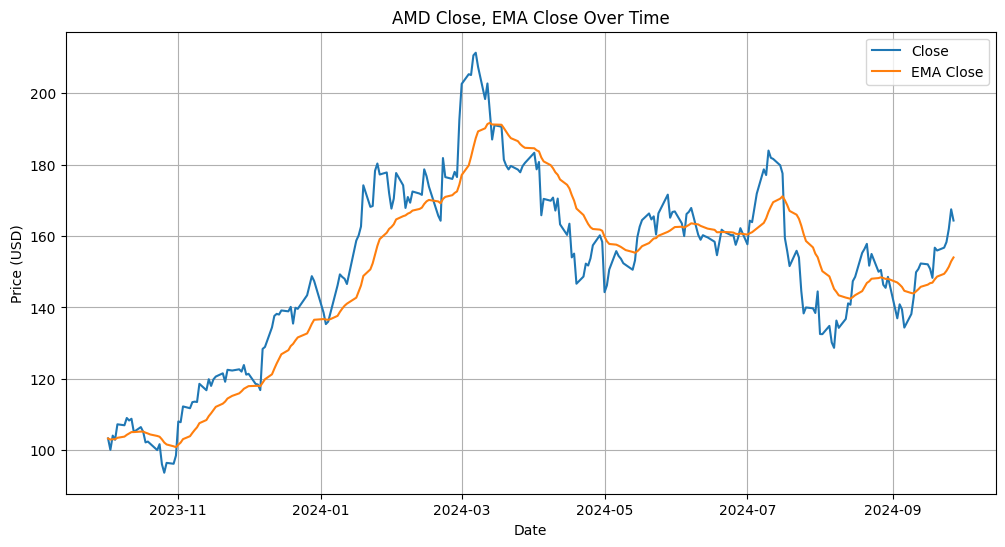

In [19]:
# plotting Close, EMA_Close over time in a single plot

plt.figure(figsize=(12, 6))
plt.plot(new_df.index, new_df['Close'], label='Close')
plt.plot(new_df.index, new_df['EMA_Close'], label='EMA Close')
plt.title(f'{stock_ticker} Close, EMA Close Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

## RSI - measures the speed and magnitude of a security's recent price changes to detect overvalued or undervalued conditions in the price of that security.




*   RSI readings below 30 signal buy opportunities, indicating the asset is undervalued. Conversely, RSI readings above 70 signal sell opportunities, suggesting the asset is overvalued. A value of 50 signifies a balance between bullish and bearish positions or a neutral stance.

* Generally, the initial RSI value is calculated using 14 periods.

In [20]:
def calculate_rsi(data, window=14):

  delta = data.diff()
  gain = delta.where(delta > 0, 0)
  loss = -delta.where(delta < 0, 0)

  avg_gain = gain.rolling(window=window, center=False).mean()
  avg_loss = loss.rolling(window=window, center=False).mean()

  rs = avg_gain / avg_loss
  rsi = 100 - (100 / (1 + rs))

  return rsi

In [21]:
new_df['RSI'] = calculate_rsi(new_df['Close'])

In [22]:
# new_df[['Close','RSI']][10:20]  #Showing Range from 10 to 20

## Bollinger Bands - envelopes plotted at a standard deviation level above and below a simple moving average of the price.


In [23]:
new_df['Upper_Band'] = new_df['SMA_20'] + (new_df['SMA_20'].std() * 2)

In [24]:
new_df['Lower_Band'] = new_df['SMA_20'] - (new_df['SMA_20'].std() * 2)

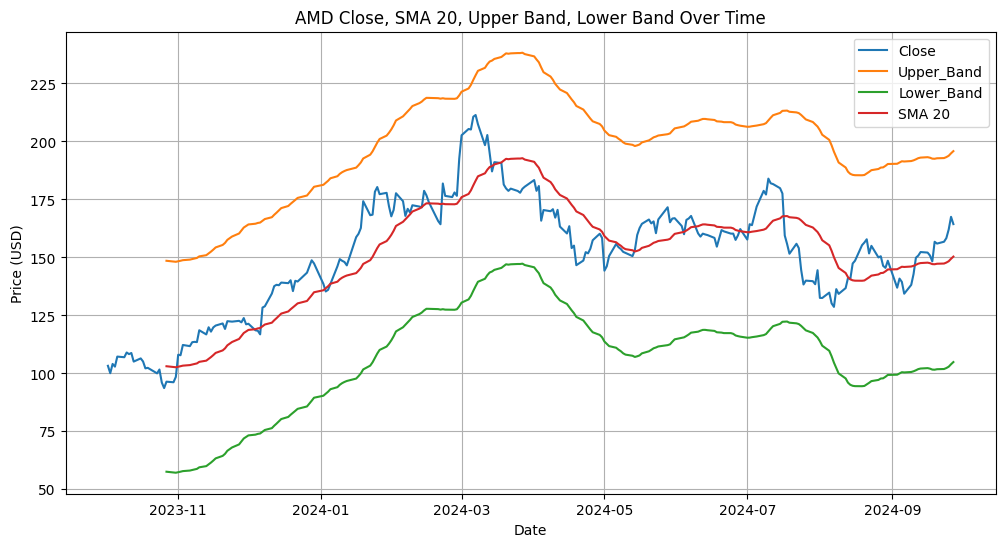

In [25]:
# plotting Close, SMA_20, Upper_band, Lower_band over time in a single plot
# Daily closing prices vs. Bollinger Bands (high and low bands showing volatility).


plt.figure(figsize=(12, 6))
plt.plot(new_df.index, new_df['Close'], label='Close')
plt.plot(new_df.index, new_df['Upper_Band'], label='Upper_Band')
plt.plot(new_df.index, new_df['Lower_Band'], label='Lower_Band')
plt.plot(new_df.index, new_df['SMA_20'], label='SMA 20')
plt.title(f'{stock_ticker} Close, SMA 20, Upper Band, Lower Band Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

## MACD (Moving Average Convergence Divergence) -  is a momentum indicator that shows the relationship between two moving averages of a security's price.

* The MACD indicator has many moving parts and functions, but it’s made up of three general components: the MACD line, which is the difference between two moving averages; a signal line, which is a moving average of the MACD line; and a histogram.

In [26]:
# MACD Calculation
short_window = 12
long_window = 26
signal_window = 9

new_df['EMA_Short'] = new_df['Close'].ewm(span=short_window, adjust=False).mean()
new_df['EMA_Long'] = new_df['Close'].ewm(span=long_window, adjust=False).mean()

new_df['MACD'] = new_df['EMA_Short'] - new_df['EMA_Long']
new_df['Signal_Line'] = new_df['MACD'].ewm(span=signal_window, adjust=False).mean()


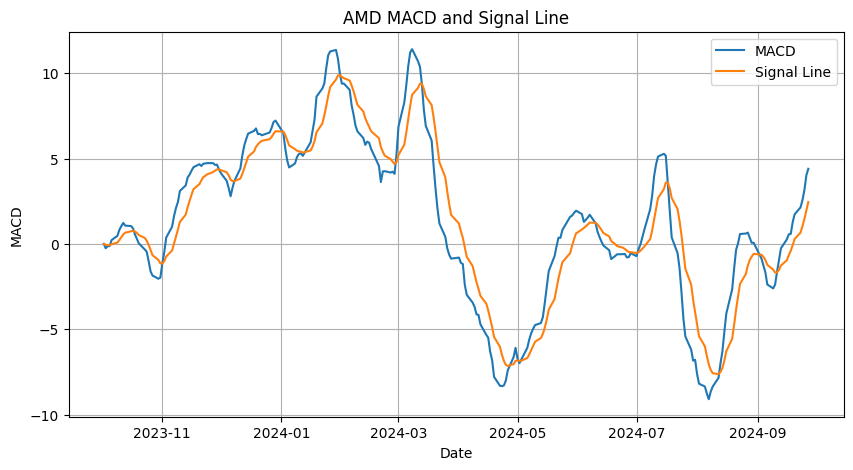

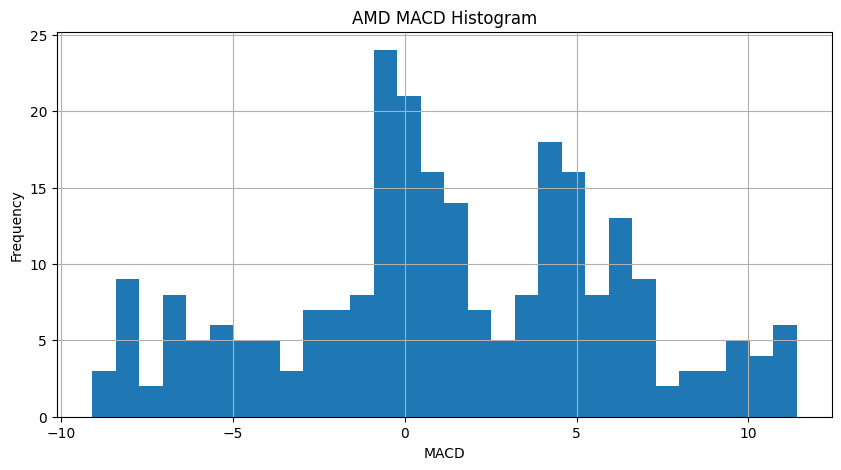

In [27]:
# Plotting MACD and Signal Line
plt.figure(figsize=(10, 5))
plt.plot(new_df.index, new_df['MACD'], label='MACD')
plt.plot(new_df.index, new_df['Signal_Line'], label='Signal Line')
plt.title(f'{stock_ticker} MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()

# Histogram for MACD
plt.figure(figsize=(10, 5))
plt.hist(new_df['MACD'], bins=30)
plt.title(f'{stock_ticker} MACD Histogram')
plt.xlabel('MACD')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Anomaly Detection Techniques

## Statistical Methods:

## Z-Score


In [28]:
from scipy import stats

# Calculate the Z-score for the 'Close' price

# USING FORMALA ----------------
# new_df['Close_Zscore'] = (new_df['Close'] - new_df['Close'].mean()) / new_df['Close'].std()

# USING LIBRARRY
new_df['Close_Zscore'] = stats.zscore(new_df['Close'])

In [29]:
# new_df[['Close', 'Close_Zscore']]

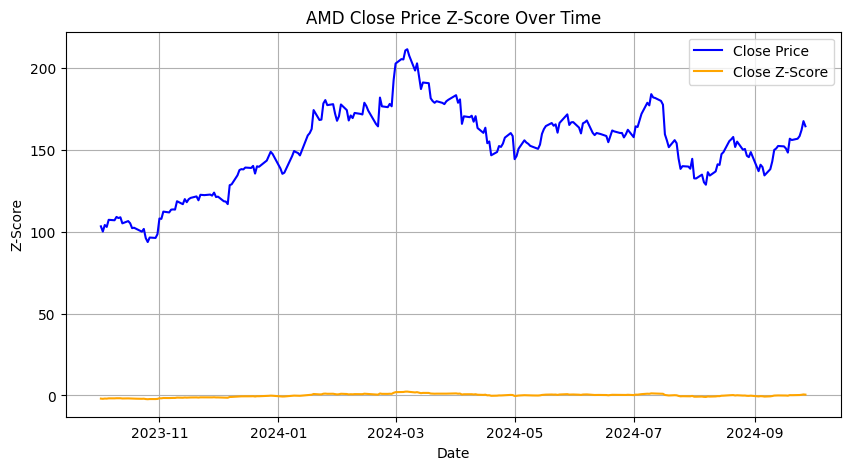

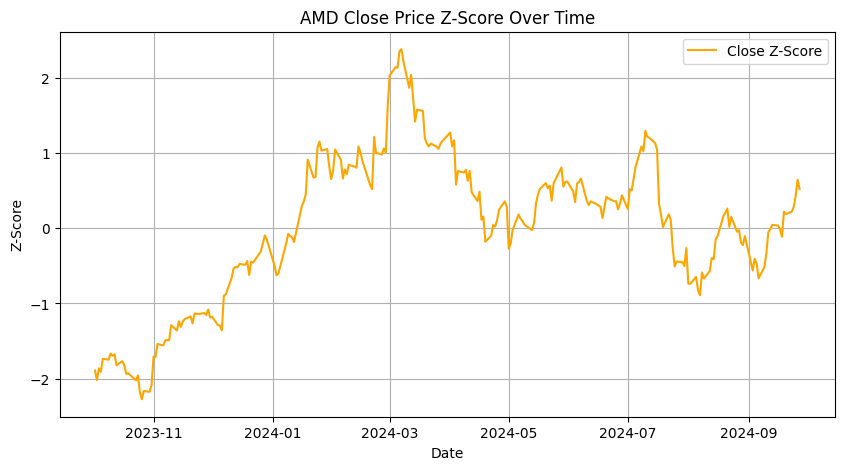

In [30]:
# Plotting Z-Score for Close price

plt.figure(figsize=(10, 5))
plt.plot(new_df.index, new_df['Close'], label='Close Price', color='blue')
plt.plot(new_df.index, new_df['Close_Zscore'], label='Close Z-Score', color='orange')
plt.title(f'{stock_ticker} Close Price Z-Score Over Time')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.grid(True)
plt.legend()
plt.show()



plt.figure(figsize=(10, 5))
plt.plot(new_df.index, new_df['Close_Zscore'], label='Close Z-Score', color='orange')
plt.title(f'{stock_ticker} Close Price Z-Score Over Time')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.grid(True)
plt.legend()
plt.show()

In [31]:
unique_z_scores = new_df['Close_Zscore'].unique()
positive_count = (new_df['Close_Zscore'] > 0).sum()
negative_count = (new_df['Close_Zscore'] < 0).sum()


print(f"Number of unique Z-scores in 'Close_Zscore': {len(unique_z_scores)}")
print(f"Number of positive Z-scores: {positive_count}")
print(f"Number of negative Z-scores: {negative_count}")

Number of unique Z-scores in 'Close_Zscore': 245
Number of positive Z-scores: 139
Number of negative Z-scores: 111


In [32]:
threshold = 1.2

new_df['Anomaly'] = np.where(np.abs(new_df['Close_Zscore']) > threshold, 'YES', "NO")

print(new_df[['Anomaly', 'Close', 'Close_Zscore']])

print(new_df['Anomaly'].unique())

           Anomaly       Close  Close_Zscore
Date                                        
2023-10-02     YES  103.269997     -1.894789
2023-10-03     YES  100.080002     -2.021070
2023-10-04     YES  104.070000     -1.863119
2023-10-05     YES  102.910004     -1.909040
2023-10-06     YES  107.239998     -1.737630
...            ...         ...           ...
2024-09-23      NO  156.750000      0.222302
2024-09-24      NO  158.320007      0.284454
2024-09-25      NO  162.020004      0.430924
2024-09-26      NO  167.490005      0.647463
2024-09-27      NO  164.350006      0.523161

[250 rows x 3 columns]
['YES' 'NO']


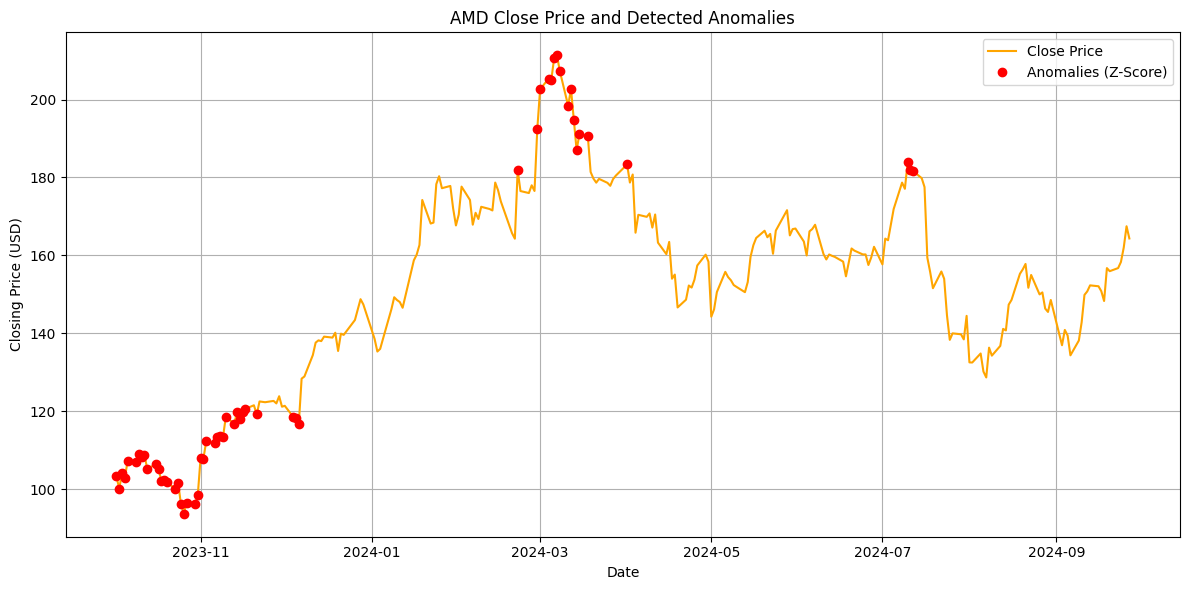

In [33]:
plt.figure(figsize=(12, 6))

# Plot the closing prices
plt.plot(new_df.index, new_df['Close'], label='Close Price', color='orange')

# Plot the anomalies
plt.plot(new_df[new_df['Anomaly'] == 'YES'].index, new_df[new_df['Anomaly'] == 'YES']['Close'], 
         'ro', label='Anomalies (Z-Score)')

# Add titles and labels
plt.title(f'{stock_ticker} Close Price and Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')

# Show legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

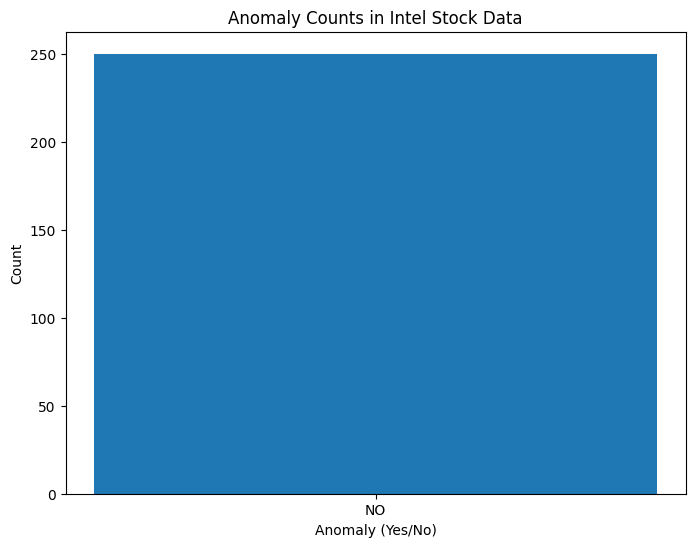

In [37]:
# Plotting bar graph for anomaly counts
anomaly_counts = new_df['Anomaly'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(anomaly_counts.index, anomaly_counts.values)
plt.title('Anomaly Counts in Intel Stock Data')
plt.xlabel('Anomaly (Yes/No)')
plt.ylabel('Count')
plt.show()

For now, this data, there is no anomaly detected using Zscore.

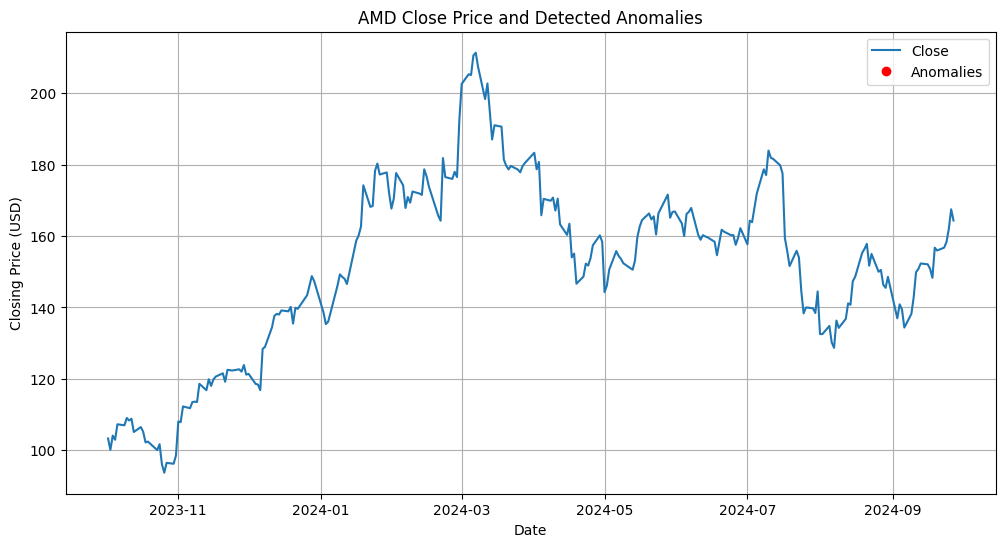

In [38]:
# plotting for Close and Anomaly

plt.figure(figsize=(12, 6))

plt.plot(new_df.index, new_df['Close'], label='Close')
# plt.plot(new_df.index, new_df['Close_Zscore'], label='Close Price')

plt.plot(new_df[new_df['Anomaly'] == 'YES'].index, new_df[new_df['Anomaly'] == 'YES']['Close'], 'ro', label='Anomalies')

plt.title(f'{stock_ticker} Close Price and Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Machine Learning Approach

## Isolation Forest: Detects outliers by isolating points that appear different from others in the dataset.

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [55]:
# Create iso_df by copying the specified columns from new_df
iso_df = new_df[['Close','Price Change', 'Volatility (7 days)', 'Volatility (30 days)', 'SMA_10', 'EMA_Close', 'RSI', 'Upper_Band','Lower_Band', 'Close_Zscore', 'MACD', 'Signal_Line']].copy()

In [56]:
print(iso_df.isna().sum().sum())
# iso_df.isna().sum()

98


In [57]:
iso_df.dropna(inplace=True)

In [58]:
iso_df.isna().sum().sum()

0

In [59]:
iso_df.shape

(220, 12)

In [60]:
scaler=StandardScaler()
X = scaler.fit_transform(iso_df)

iso_forest = IsolationForest(contamination=0.05, random_state=42)

In [61]:
iso_df['Anomaly_Pred'] = iso_forest.fit_predict(X)


In [62]:
iso_df['Anomaly_Pred'].value_counts()

Anomaly_Pred
 1    209
-1     11
Name: count, dtype: int64

In [63]:
anomaly_count = (iso_df['Anomaly_Pred'] == -1).sum()
print(f"Number of anomalies detected by Isolation Forest: {anomaly_count}")

Number of anomalies detected by Isolation Forest: 11


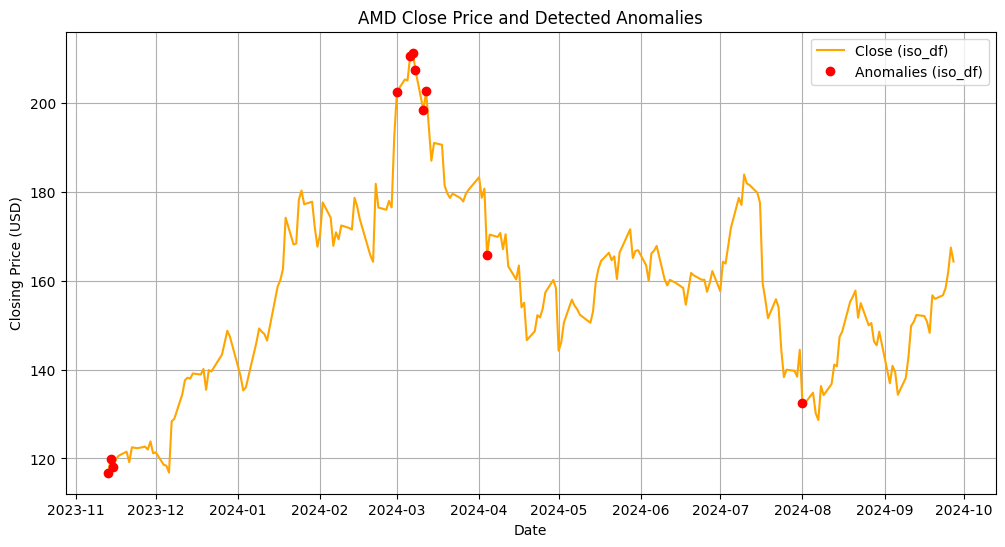

In [64]:
# plotting for Close and Anomaly

plt.figure(figsize=(12, 6))

plt.plot(iso_df.index, iso_df['Close'], label='Close (iso_df)', color='orange')
plt.plot(iso_df[iso_df['Anomaly_Pred'] == -1].index, iso_df[iso_df['Anomaly_Pred'] == -1]['Close'], 'ro', label='Anomalies (iso_df)')

plt.title(f'{stock_ticker} Close Price and Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# One Class SVM

In [65]:
# Create svm_df by selecting the relevant columns
svm_df = new_df[['Close', 'Price Change', 'Volatility (7 days)', 'Volatility (30 days)', 'SMA_10', 'EMA_Close', 'RSI', 'Upper_Band', 'Lower_Band', 'Close_Zscore']].copy()

In [66]:
print(svm_df.isna().sum().sum())
# svm_df.isna().sum()

98


In [67]:
svm_df.dropna(inplace=True)

In [68]:
svm_df.isna().sum().sum()

0

In [69]:
from sklearn.svm import OneClassSVM

In [70]:
svm_model = OneClassSVM(nu= 0.05, kernel='rbf')
svm_model.fit(svm_df)

OneClassSVM(nu=0.05)

In [71]:
# Predict anomalies (-1 indicates anomalies, 1 indicates normal)
svm_df['SVM_Anomaly_Pred'] = svm_model.predict(svm_df)

In [72]:
svm_df['SVM_Anomaly_Pred'].value_counts()

SVM_Anomaly_Pred
 1    209
-1     11
Name: count, dtype: int64

In [73]:
svm_anomaly_count = (svm_df['SVM_Anomaly_Pred'] == -1).sum()
print(f"Number of anomalies detected by One-Class SVM: {svm_anomaly_count}")

Number of anomalies detected by One-Class SVM: 11


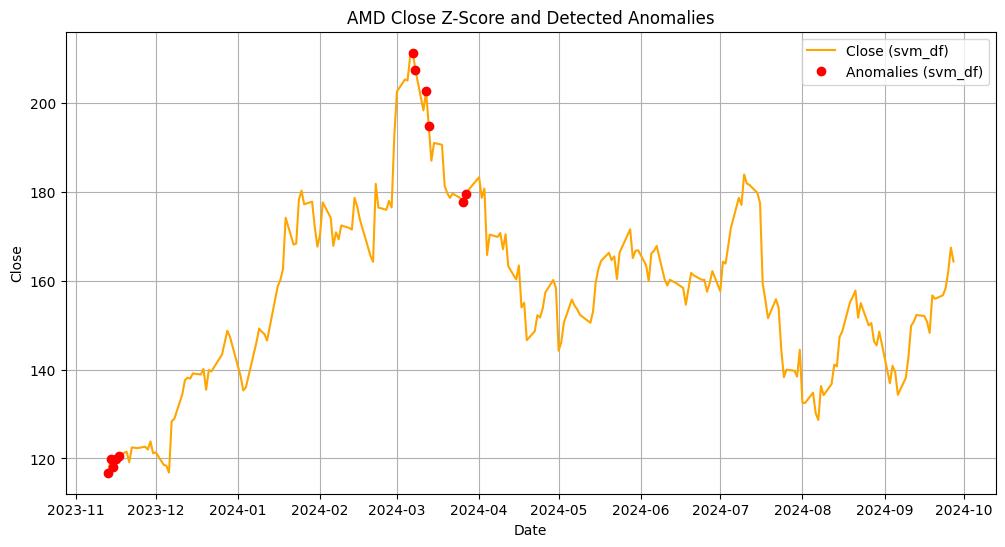

In [74]:
# Plotting for Close and Anomalies

plt.figure(figsize=(12, 6))

plt.plot(svm_df.index, svm_df['Close'], label='Close (svm_df)', color='orange')

plt.plot(svm_df[svm_df['SVM_Anomaly_Pred'] == -1].index, svm_df[svm_df['SVM_Anomaly_Pred'] == -1]['Close'], 'ro', label='Anomalies (svm_df)')

plt.title(f'{stock_ticker} Close Z-Score and Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.show()


# DBSCAN

In [75]:
# Create dbscan_df by selecting the relevant columns
dbscan_df = new_df[['Close', 'Price Change', 'Volatility (7 days)', 'Volatility (30 days)', 'SMA_10', 'EMA_Close', 'RSI', 'Upper_Band', 'Lower_Band', 'Close_Zscore']].copy()

In [76]:
dbscan_df.dropna(inplace=True)

In [77]:
dbscan_df.isnull().sum().sum()

0

In [78]:
from sklearn.cluster import DBSCAN

In [79]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [80]:
scaler=StandardScaler()
X2 = scaler.fit_transform(dbscan_df)

In [81]:
dbscan_df['Cluster'] = dbscan.fit_predict(X2)

In [82]:
dbscan_df.Cluster.value_counts()

Cluster
-1    220
Name: count, dtype: int64

In [83]:
dbscan_df['Anomaly_Detected'] = dbscan_df['Cluster'] == -1


In [84]:
dbscan_df['Anomaly_Detected'].value_counts()

Anomaly_Detected
True    220
Name: count, dtype: int64

In [85]:
anomaly_count = (dbscan_df['Cluster'] == -1).sum()

print(f"Number of anomalies detected by DBSCAN: {anomaly_count}")

Number of anomalies detected by DBSCAN: 220


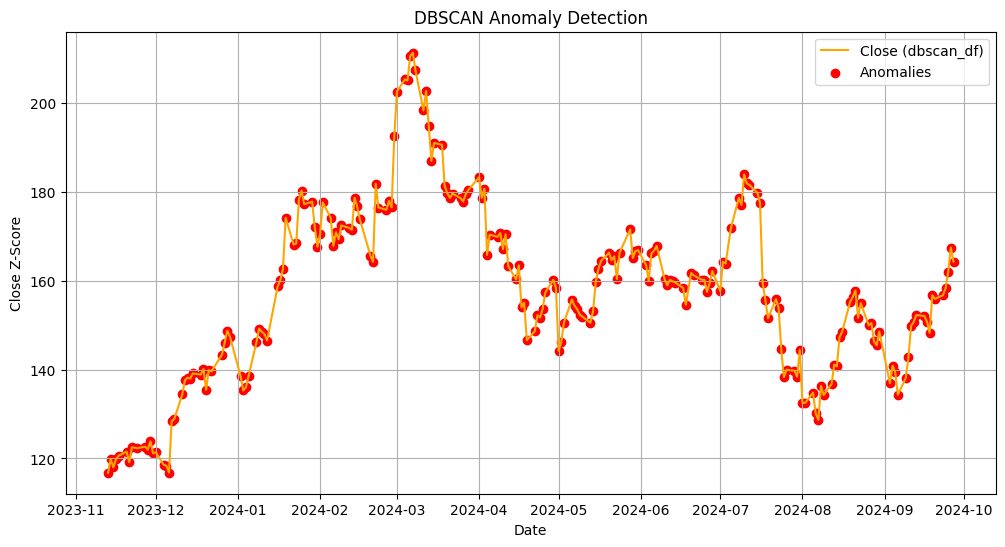

In [86]:
plt.figure(figsize=(12, 6))

# Plotting the clusters
plt.plot(dbscan_df.index, dbscan_df['Close'], label='Close (dbscan_df)', color='orange')

# Plot anomalies
plt.scatter(dbscan_df[dbscan_df['Anomaly_Detected'] == True].index,
            dbscan_df[dbscan_df['Anomaly_Detected'] == True]['Close'],
            color='red', label='Anomalies', marker='o')

plt.title('DBSCAN Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Close Z-Score')
plt.legend()
plt.grid(True)
plt.show()


In [67]:
# # Plotting the anomalies detected by Isolation Forest
# plt.figure(figsize=(12, 6))
# plt.plot(new_df.index, new_df['Close_Zscore'], label='Close Price')
# plt.scatter(model_df[model_df['Anomaly_Pred'] == -1].index,
#             model_df[model_df['Anomaly_Pred'] == -1]['Close_Zscore'],
#             color='red', label='Anomalies (Isolation Forest)')
# plt.title('Intel Stock Close Price and Anomalies (Isolation Forest)')
# plt.xlabel('Date')
# plt.ylabel('Closing Price (USD)')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Plotting the anomalies detected by One-Class SVM
# plt.figure(figsize=(12, 6))
# plt.plot(new_df.index, new_df['Close_Zscore'], label='Close Price')
# plt.scatter(svm_df[svm_df['SVM_Anomaly_Pred'] == -1].index,
#             svm_df[svm_df['SVM_Anomaly_Pred'] == -1]['Close_Zscore'],
#             color='red', label='Anomalies (One-Class SVM)')
# plt.title('Intel Stock Close Price and Anomalies (One-Class SVM)')
# plt.xlabel('Date')
# plt.ylabel('Closing Price (USD)')
# plt.legend()
# plt.grid(True)
# plt.show()


# # Plotting the anomalies detected by DBSCAN
# plt.figure(figsize=(12, 6))
# plt.plot(new_df.index, new_df['Close_Zscore'], label='Close Price')
# plt.scatter(dbscan_df[dbscan_df['Anomaly_Detected']].index,
#             dbscan_df[dbscan_df['Anomaly_Detected']]['Close_Zscore'],
#             color='red', label='Anomalies (DBSCAN)')
# plt.title('Intel Stock Close Price and Anomalies (DBSCAN)')
# plt.xlabel('Date')
# plt.ylabel('Closing Price (USD)')
# plt.legend()
# plt.grid(True)
# plt.show()

In [87]:
# Count the number of anomalies for each method
num_anomalies_isolation_forest = len(iso_df[iso_df['Anomaly_Pred'] == -1])
num_anomalies_svm = len(svm_df[svm_df['SVM_Anomaly_Pred'] == -1])
num_anomalies_dbscan = len(dbscan_df[dbscan_df['Anomaly_Detected'] == True])

print("Number of anomalies detected by Isolation Forest:", num_anomalies_isolation_forest)
print("Number of anomalies detected by One-Class SVM:", num_anomalies_svm)
print("Number of anomalies detected by DBSCAN:", num_anomalies_dbscan)

Number of anomalies detected by Isolation Forest: 11
Number of anomalies detected by One-Class SVM: 11
Number of anomalies detected by DBSCAN: 220


# Deep Learning Methods

## LSTM

In [88]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [89]:
# from tensorflow.keras.callbacks import EarlyStopping

In [90]:
# Create lstm_df by selecting relevant columns for LSTM
lstm_df = new_df[['Close', 'Price Change', 'Volatility (7 days)', 'Volatility (30 days)',
                  'SMA_10', 'SMA_20', 'EMA_Close', 'RSI', 'Upper_Band', 'Lower_Band', 'Close_Zscore']].copy()

In [91]:
lstm_df.isna().sum().sum()

117

In [92]:
lstm_df.shape

(250, 11)

In [93]:
lstm_df.dropna(inplace=True)

In [94]:
lstm_df['Close'] = lstm_df['Close'].astype(float)
prices = lstm_df['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

In [95]:
prices.shape

(220, 1)

In [96]:
# Create sequences
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [97]:
time_step_lstm = 10
X, y = create_sequences(scaled_prices, time_step_lstm)

In [98]:
X.shape

(209, 10)

In [99]:
y.shape

(209,)

In [100]:
# Reshape X to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [101]:
X.shape

(209, 10, 1)

In [102]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [103]:
model.fit(X, y, epochs=100, batch_size=32, verbose = 0)

In [104]:
# Generate predictions
predicted = model.predict(X)

# Inverse transform to get actual values
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y.reshape(-1, 1))

# Calculate errors
error = actual - predicted

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [105]:
# Generate predictions
predicted = model.predict(X)

# Inverse transform to get actual values
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y.reshape(-1, 1))

# Calculate errors
error = actual - predicted


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [106]:
print(predicted.shape)
print(actual.shape)
# print(actual.shape)

(209, 1)
(209, 1)


In [107]:
# Define a threshold
threshold = 1.5 * np.std(error)  # You can adjust this threshold based on your needs

# Identify anomalies
anomalies_lstm = np.where(np.abs(error) > threshold)[0]


In [108]:
print("Number of anomalies detected by LSTM:", len(anomalies_lstm))

Number of anomalies detected by LSTM: 20


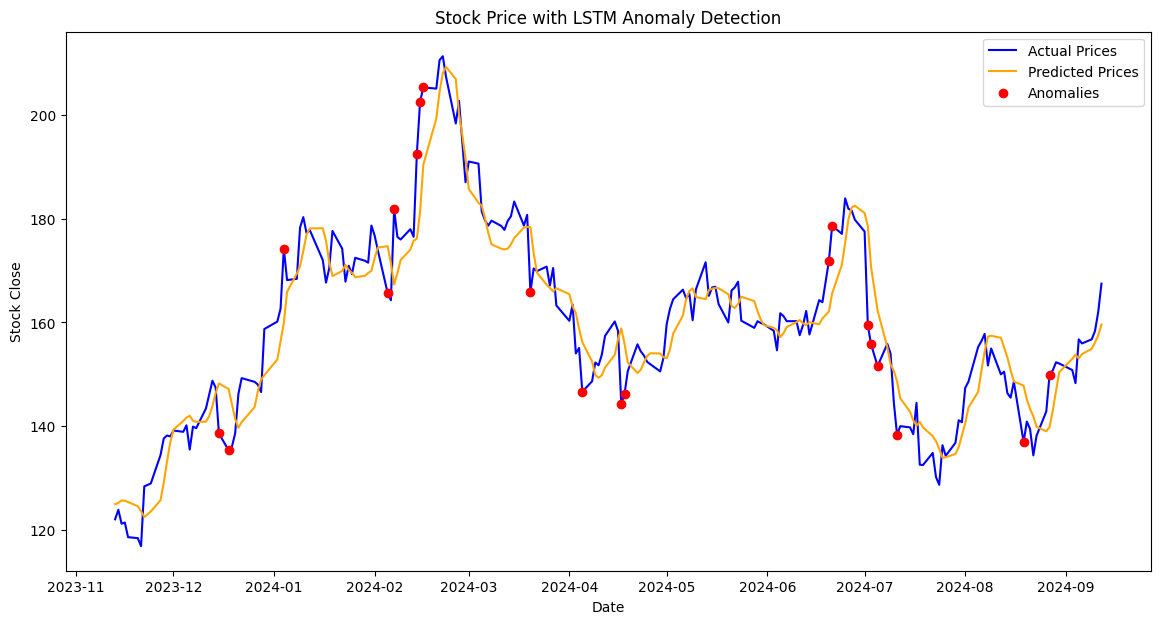

In [109]:
plt.figure(figsize=(14, 7))
plt.plot(lstm_df.index[:len(actual)], actual, label='Actual Prices', color='blue')
plt.plot(lstm_df.index[:len(predicted)], predicted, label='Predicted Prices', color='orange')
plt.scatter(lstm_df.iloc[anomalies_lstm].index, actual[anomalies_lstm], color='red', label='Anomalies', zorder=5)
plt.xlabel('Date')
plt.ylabel('Stock Close')
plt.title('Stock Price with LSTM Anomaly Detection')
plt.legend()
plt.show()

## Auto Encoder

In [110]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [111]:
# Create lstm_df by selecting relevant columns for LSTM
autoenc_df = new_df[['Close', 'Price Change', 'Volatility (7 days)', 'Volatility (30 days)',
                  'SMA_10', 'SMA_20', 'EMA_Close', 'RSI', 'Upper_Band', 'Lower_Band', 'Close_Zscore']].copy()

In [112]:
autoenc_df.isna().sum().sum()

117

In [113]:
autoenc_df.dropna(inplace=True)

In [114]:
autoenc_df['Close'] = autoenc_df['Close'].astype(float)
prices = autoenc_df['Close'].values.reshape(-1, 1)

In [115]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

In [116]:
# Create sequences for training (e.g., using time steps of 10)
def create_sequences_for_AutoEnc(data, time_step=1):
    sequences = []
    for i in range(len(data) - time_step):
        sequences.append(data[i:(i + time_step), 0])
    return np.array(sequences)

In [117]:
time_step = 10
X = create_sequences_for_AutoEnc(scaled_prices, time_step)

In [118]:
X = X.reshape(X.shape[0], X.shape[1])

In [119]:
#  Build the Autoencoder Model

In [120]:
input_dim = X.shape[1]

# Define the Autoencoder architecture
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [121]:
autoencoder.fit(X, X, epochs=100, batch_size=32, shuffle=True, validation_split=0.2, verbose = 0)

In [122]:
# Get the reconstructed output
reconstructed = autoencoder.predict(X)

# Calculate the reconstruction error
mse = np.mean(np.power(X - reconstructed, 2), axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [123]:
# Define a threshold
threshold = 0.01  # Adjust based on your specific use case
anomalies = np.where(mse > threshold)[0]


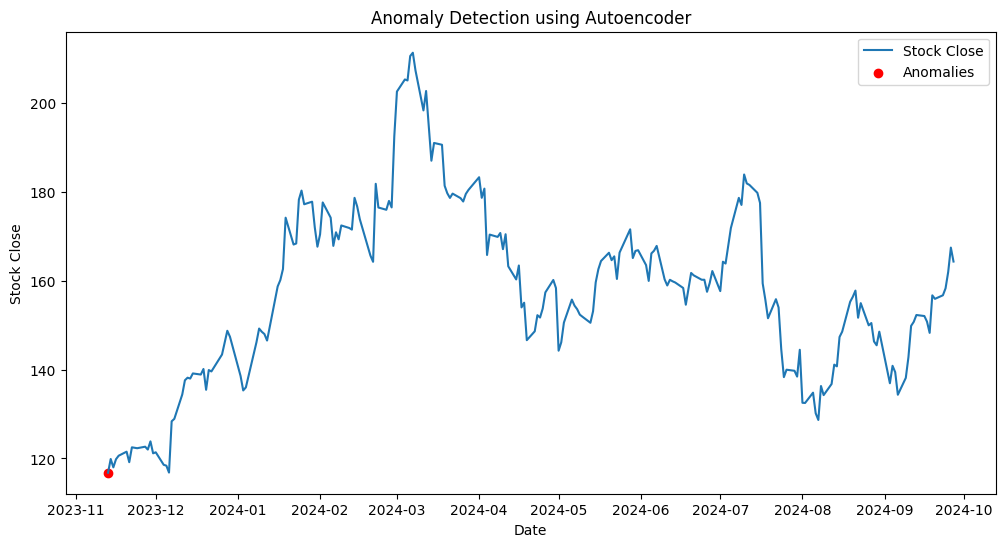

In [124]:
plt.figure(figsize=(12, 6))
plt.plot(autoenc_df.index, autoenc_df['Close'], label='Stock Close')
plt.scatter(autoenc_df.iloc[anomalies].index, autoenc_df.iloc[anomalies]['Close'], color='red', label='Anomalies')
plt.title('Anomaly Detection using Autoencoder')
plt.xlabel('Date')
plt.ylabel('Stock Close')
plt.legend()
plt.show()

# Model Evaluation


In [125]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [159]:
final_df = new_df.copy()

In [160]:
print(final_df.shape)
print(new_df.shape)

(250, 19)
(250, 19)


In [161]:
final_df['Combined_Anomaly'] = (
    (abs(final_df['Close_Zscore']) > 3) |
    (iso_df['Anomaly_Pred'] == -1) |
    (dbscan_df['Cluster'] == -1) |
    (np.isin(final_df.index, lstm_df.iloc[anomalies_lstm].index)) |
    (np.isin(final_df.index, autoenc_df.iloc[anomalies].index)) |
    (svm_df['SVM_Anomaly_Pred'] == -1)
).astype(int)

In [162]:
print(final_df.shape)
print(final_df['Combined_Anomaly'].shape)

(250, 20)
(250,)


In [163]:
final_df['Combined_Anomaly'].isnull().sum().sum()

0

In [164]:
final_df['Combined_Anomaly'].dropna(inplace = True)

In [165]:
print(final_df.shape)

(250, 20)


In [166]:
final_df['Combined_Anomaly'].value_counts()

Combined_Anomaly
1    220
0     30
Name: count, dtype: int64

# Final Visualization


In [167]:
methods = ['Z_Score', 'Isolation Forest', 'One Class SVM', 'DBSCAN']
results = []

for method in methods:
    if method == 'Z_Score':
        predictions = (abs(final_df['Close_Zscore']) > 3).astype(int)
    elif method == 'Isolation Forest':
        predictions = (iso_df['Anomaly_Pred'] == -1).astype(int)
    elif method == 'DBSCAN':
        predictions = (dbscan_df['Cluster'] == -1).astype(int)
    else:
        predictions = (svm_df['SVM_Anomaly_Pred'] == -1).astype(int)
        # print('Something Else')

    precision = precision_score(final_df['Combined_Anomaly'][:len(predictions)], predictions)
    recall = recall_score(final_df['Combined_Anomaly'][:len(predictions)], predictions)
    f1 = f1_score(final_df['Combined_Anomaly'][:len(predictions)], predictions)

    results.append({
        'Method': method,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

model_eva_df = pd.DataFrame(results)

In [112]:
lstm_predictions = [1 if x in anomalies_lstm else 0 for x in range(len(actual))]

# Dimenstions are diff. SO..
precision = precision_score(final_df['Combined_Anomaly'][0:len(lstm_predictions)], lstm_predictions)
recall = recall_score(final_df['Combined_Anomaly'][0:len(lstm_predictions)], lstm_predictions)
f1 = f1_score(final_df['Combined_Anomaly'][0:len(lstm_predictions)], lstm_predictions)

results.append({
        'Method': 'LSTM',
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

model_eva_df = pd.DataFrame(results)
print("\nComparison of all methods:")
print(model_eva_df)


Comparison of all methods:
             Method  Precision    Recall  F1-Score
0           Z_Score        0.0  0.000000  0.000000
1  Isolation Forest        1.0  0.051282  0.097561
2     One Class SVM        1.0  0.051282  0.097561
3            DBSCAN        1.0  0.991987  0.995977
4              LSTM        1.0  0.127243  0.225760


In [168]:
autoencoder_predictions = [1 if i in anomalies else 0 for i in range(len(autoenc_df))]

anomaly_subset = final_df['Combined_Anomaly'][:len(autoencoder_predictions)]

precision = precision_score(anomaly_subset, autoencoder_predictions)
recall = recall_score(anomaly_subset, autoencoder_predictions)
f1 = f1_score(anomaly_subset, autoencoder_predictions)

results.append({
        'Method': 'AutoEncoder',
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

model_eva_df = pd.DataFrame(results)
print("\nComparison of all methods:")
print(model_eva_df)


Comparison of all methods:
             Method  Precision    Recall  F1-Score
0           Z_Score   0.000000  0.000000  0.000000
1  Isolation Forest   0.727273  0.042105  0.079602
2     One Class SVM   0.545455  0.031579  0.059701
3            DBSCAN   0.863636  1.000000  0.926829
4       AutoEncoder   0.000000  0.000000  0.000000


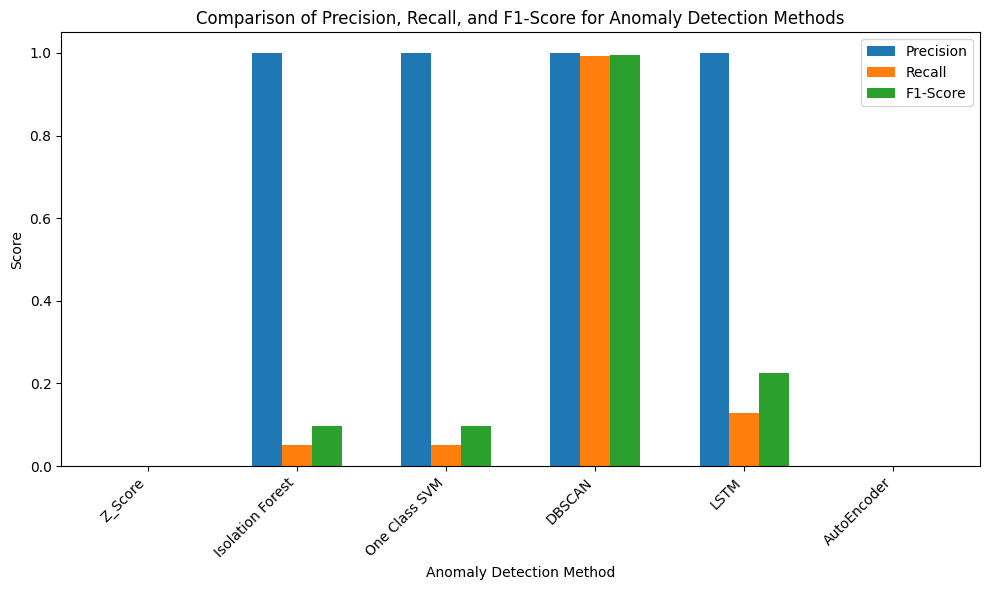

In [114]:
# Comparing all the precision, recall, f1 score using bar plot

plt.figure(figsize=(10, 6))
bar_width = 0.2

# Plotting Precision
plt.bar(np.arange(len(model_eva_df['Method'])) - bar_width, model_eva_df['Precision'], width=bar_width, label='Precision')

# Plotting Recall
plt.bar(np.arange(len(model_eva_df['Method'])), model_eva_df['Recall'], width=bar_width, label='Recall')

# Plotting F1-Score
plt.bar(np.arange(len(model_eva_df['Method'])) + bar_width, model_eva_df['F1-Score'], width=bar_width, label='F1-Score')

plt.xlabel('Anomaly Detection Method')
plt.ylabel('Score')
plt.title('Comparison of Precision, Recall, and F1-Score for Anomaly Detection Methods')
plt.xticks(np.arange(len(model_eva_df['Method'])), model_eva_df['Method'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [115]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from datetime import timedelta

fig = make_subplots()

# Plot the Close price
fig.add_trace(go.Scatter(x=new_df.index, y=new_df['Close'], mode='lines', name='Close Price'))

# Z-Score anomalies
fig.add_trace(go.Scatter(
    x=new_df[new_df['Anomaly'] == 'YES'].index,
    y=new_df[new_df['Anomaly'] == 'YES']['Close'],
    mode='markers',
    name='Anomalies (Z-Score)',
    marker=dict(color='red', size=10, symbol='circle')
))

# Isolation Forest anomalies
fig.add_trace(go.Scatter(
    x=iso_df[iso_df['Anomaly_Pred'] == -1].index,
    y=iso_df[iso_df['Anomaly_Pred'] == -1]['Close'],
    mode='markers',
    name='Anomalies (Isolation Forest)',
    marker=dict(color='blue', size=10, symbol='x')
))

# One-Class SVM anomalies
fig.add_trace(go.Scatter(
    x=svm_df[svm_df['SVM_Anomaly_Pred'] == -1].index,
    y=svm_df[svm_df['SVM_Anomaly_Pred'] == -1]['Close'],
    mode='markers',
    name='Anomalies (One-Class SVM)',
    marker=dict(color='green', size=10, symbol='star')
))

# For AutoEncoder Anomalies
fig.add_trace(go.Scatter(
    x=autoenc_df.iloc[anomalies].index,
    y=autoenc_df['Close'].iloc[anomalies],  # Ensure 'Close' is the correct column
    mode='markers',
    name='Anomalies Autoencoder',
    marker=dict(color='purple', size=10, symbol='circle-open')
))

# LSTM anomalies
fig.add_trace(go.Scatter(
    x=lstm_df.iloc[anomalies_lstm].index,
    y=lstm_df['Close'].iloc[anomalies_lstm],  # Ensure 'Close' is the correct column
    mode='markers',
    name='Anomalies LSTM',
    marker=dict(color='#b6825a', size=10, symbol='diamond')
))

# Get the minimum date and add one year to it
start_date = new_df.index.min() + pd.DateOffset(years=1)

# Update layout
fig.update_layout(
    title='Anomalies Detected by All Methods',
    xaxis_title='Date',
    yaxis_title='Close Price',
    xaxis=dict(range=[start_date, new_df.index.max()]),  # Set the x-axis range
    showlegend=True,
    template='plotly'
)

# Show the plot
fig.show()
